In [1]:
!nvidia-smi

Mon Nov  2 16:45:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.152.00   Driver Version: 418.152.00   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   32C    P8     6W / 200W |     10MiB /  8118MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!pip install tensorflow-gpu

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
     |████████████████████████████████| 320.4 MB 11 kB/s s eta 0:00:01    |█▏                              | 12.0 MB 20.7 MB/s eta 0:00:15     |██████▊                         | 67.5 MB 24.5 MB/s eta 0:00:11     |███████▊                        | 77.2 MB 24.5 MB/s eta 0:00:10     |█████████▊                      | 97.5 MB 22.2 MB/s eta 0:00:11     |██████████                      | 99.7 MB 22.2 MB/s eta 0:00:10     |██████████▌                     | 105.1 MB 17.5 MB/s eta 0:00:13     |█████████████████▍              | 174.6 MB 24.8 MB/s eta 0:00:06     |█████████████████▉              | 178.3 MB 24.8 MB/s eta 0:00:06     |███████████████████▍            | 193.8 MB 1.6 MB/s eta 0:01:19     |███████████████████████████████▋| 316.9 MB 20.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_random_seed(1)
tf.random.set_random_seed(RANDOM_SEED)

/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tarahjjeon/.local/lib/python3.5/site-packages/tensorflow/python/framework

In [ ]:
#!gdown --id 152sWECukjvLerrVG2NUO8gtMFg83RKCF --output WISDM_ar_latest.tar.gz
#!tar -xvf WISDM_ar_latest.tar.gz

In [2]:
column_names = ['x', 'y', 'z', 'label']

df = pd.read_csv('data/labeled_data.csv')

In [27]:
df.head()

,Unnamed: 0,Unnamed: 0.1,시간(ms),이름,허리인치,키,회차,낙상종류,방향,x,y,z,label
0,0,0.0,45020.0,이종모,75kg,168.0,1.0,걷기,보통,-1030.0,13760.0,5248.0,0
1,1,1.0,45089.0,이종모,75kg,168.0,1.0,걷기,보통,-2502.0,9792.0,2880.0,0
2,2,2.0,45114.0,이종모,75kg,168.0,1.0,걷기,보통,-3526.0,9984.0,3008.0,0
3,3,3.0,45168.0,이종모,75kg,168.0,1.0,걷기,보통,-1926.0,12032.0,3776.0,0
4,4,4.0,45193.0,이종모,75kg,168.0,1.0,걷기,보통,121.0,14464.0,3904.0,0


In [28]:
df.shape

(81683, 13)

### 0. 데이터 시각화 (불필요)

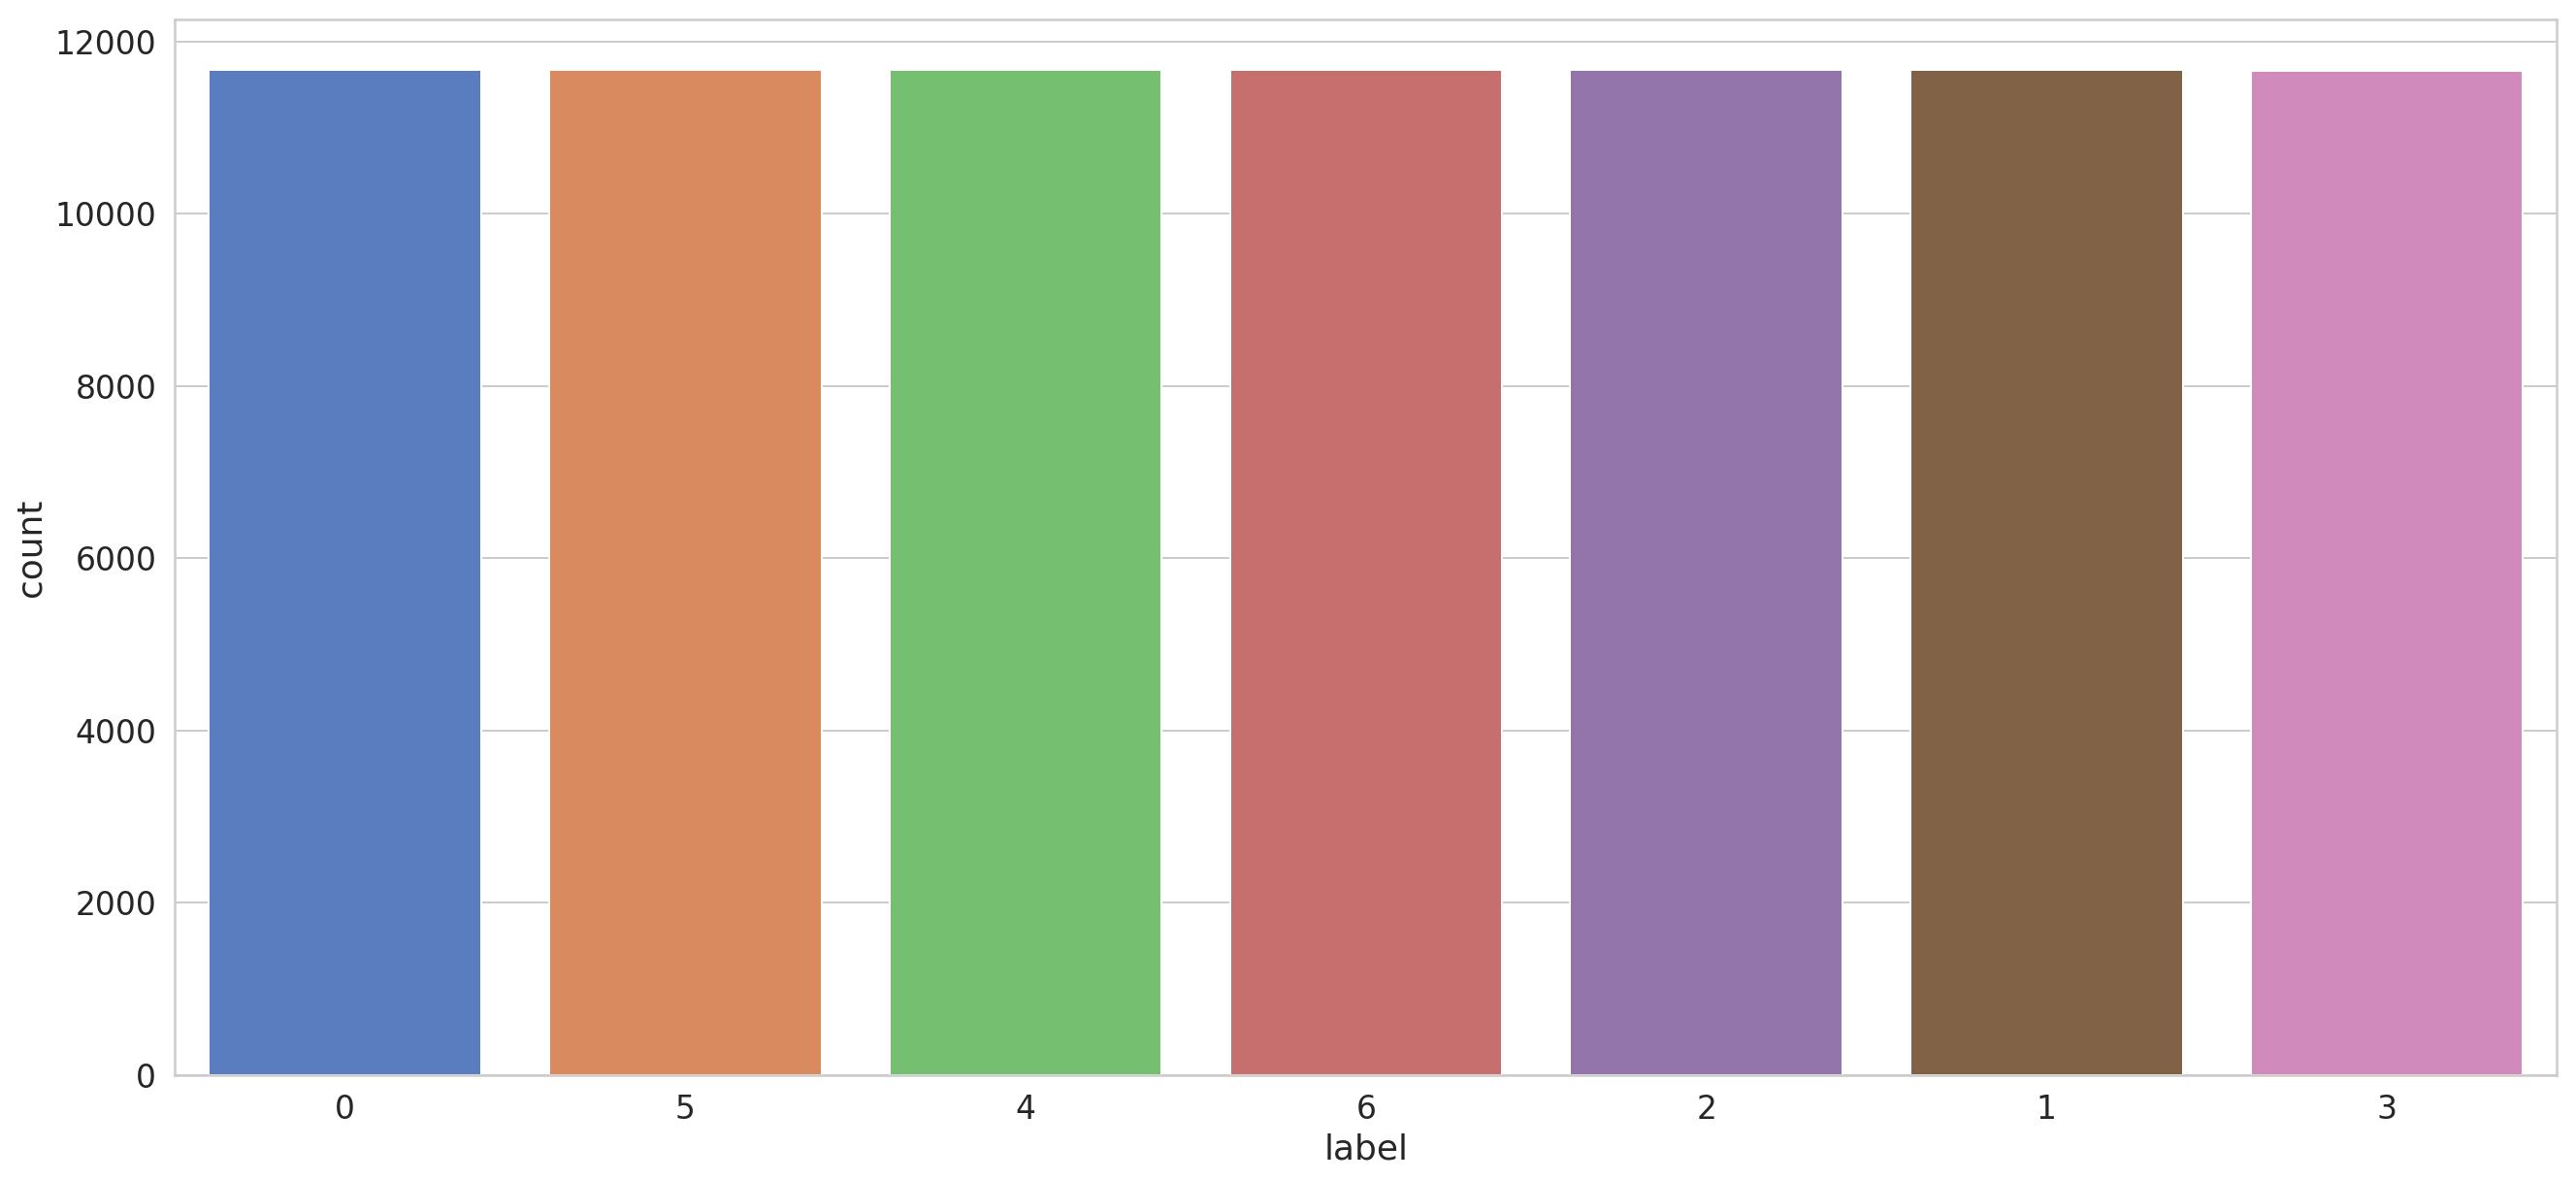

In [29]:
sns.countplot(x = 'label',
              data = df,
              order = df.label.value_counts().index);

In [30]:
def plot_activity(activity, df):
    data = df[df['label'] == activity][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

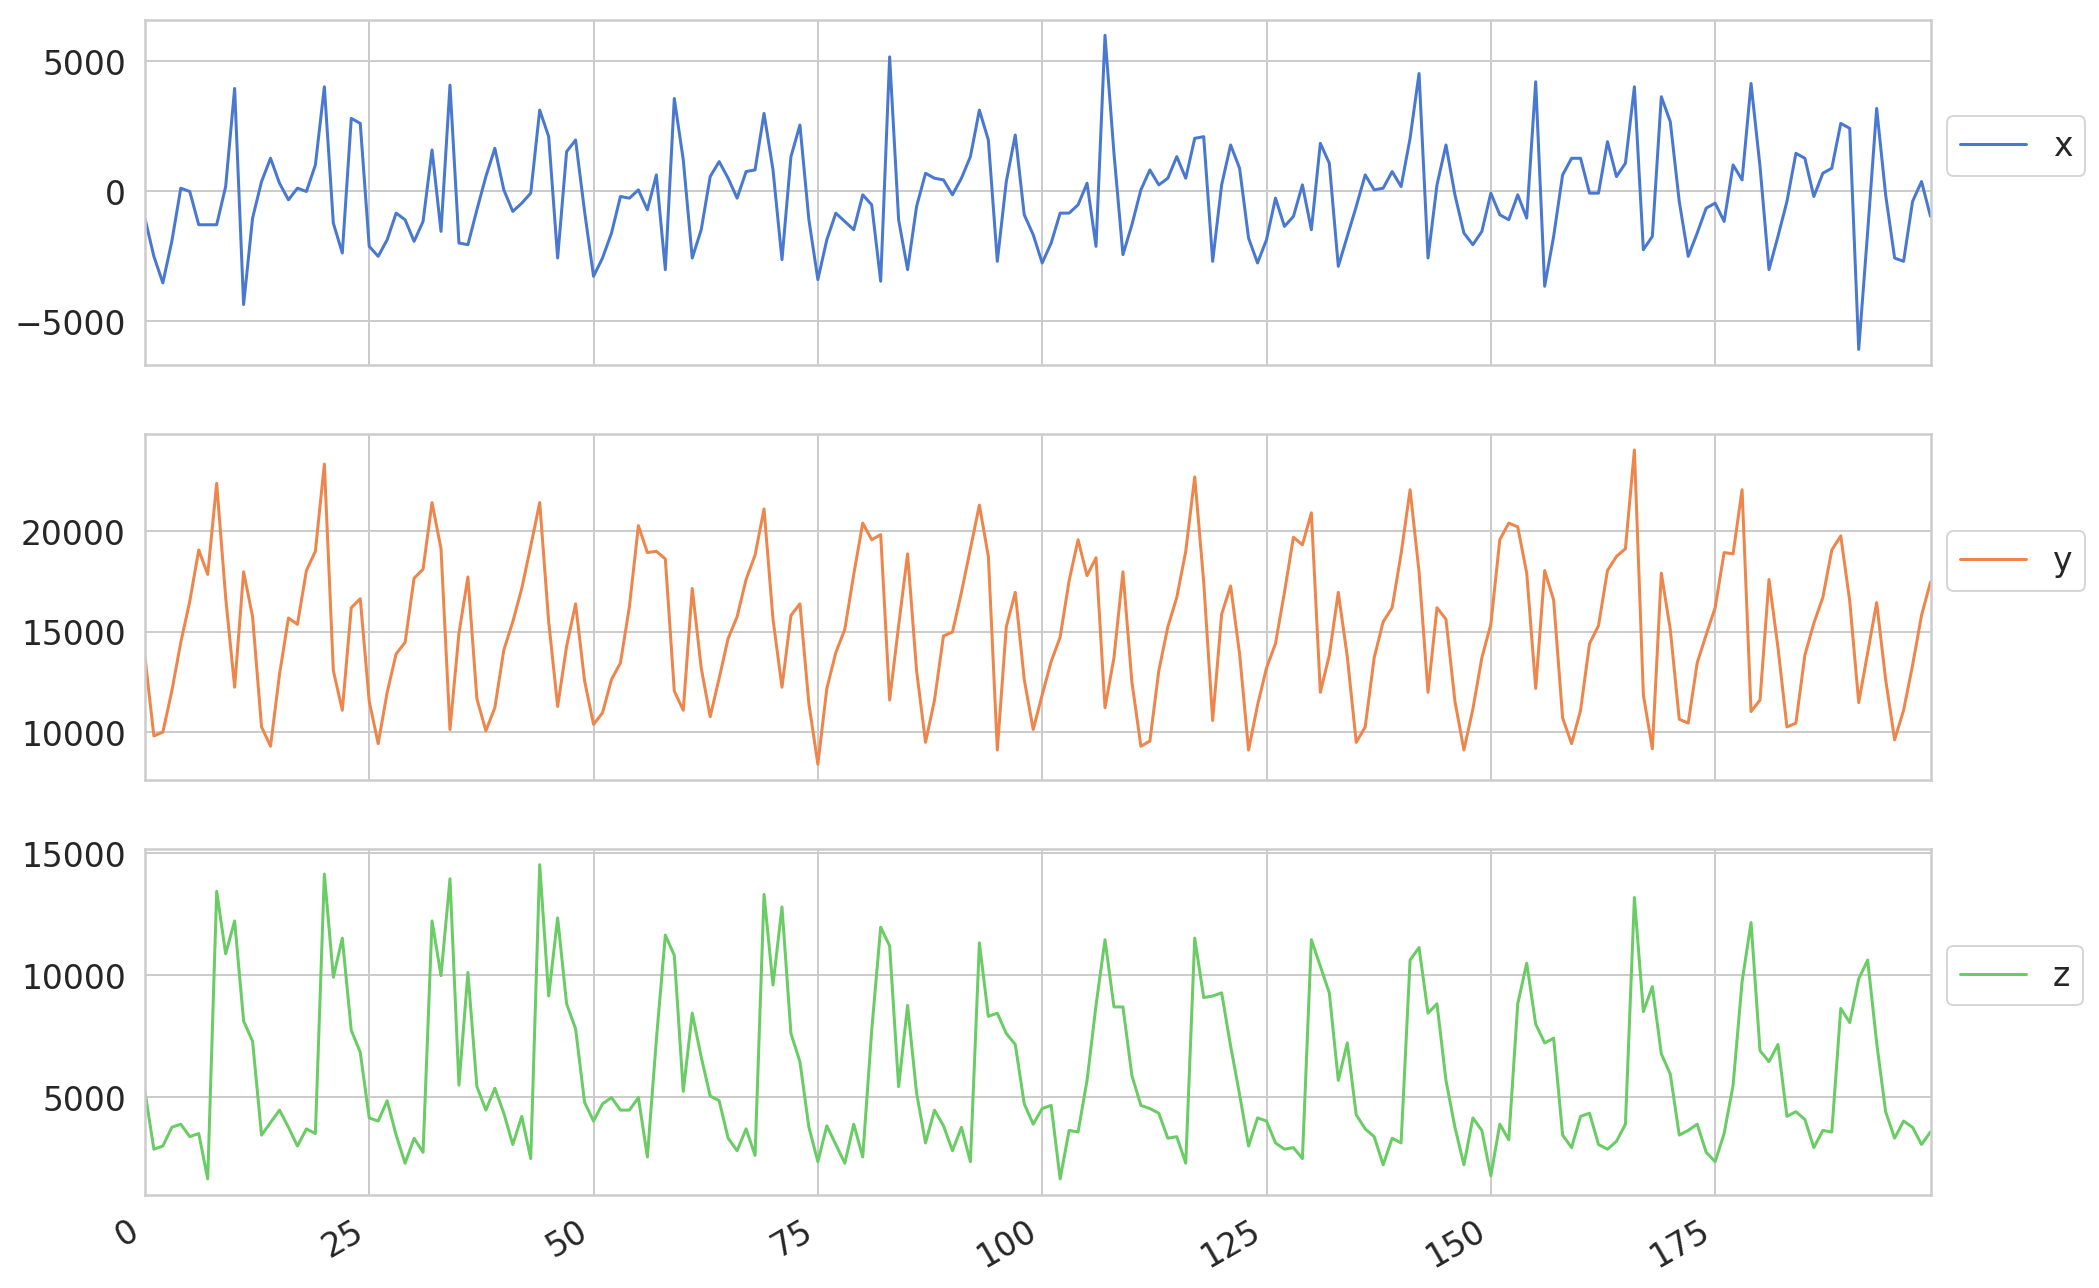

In [32]:
plot_activity(0, df);

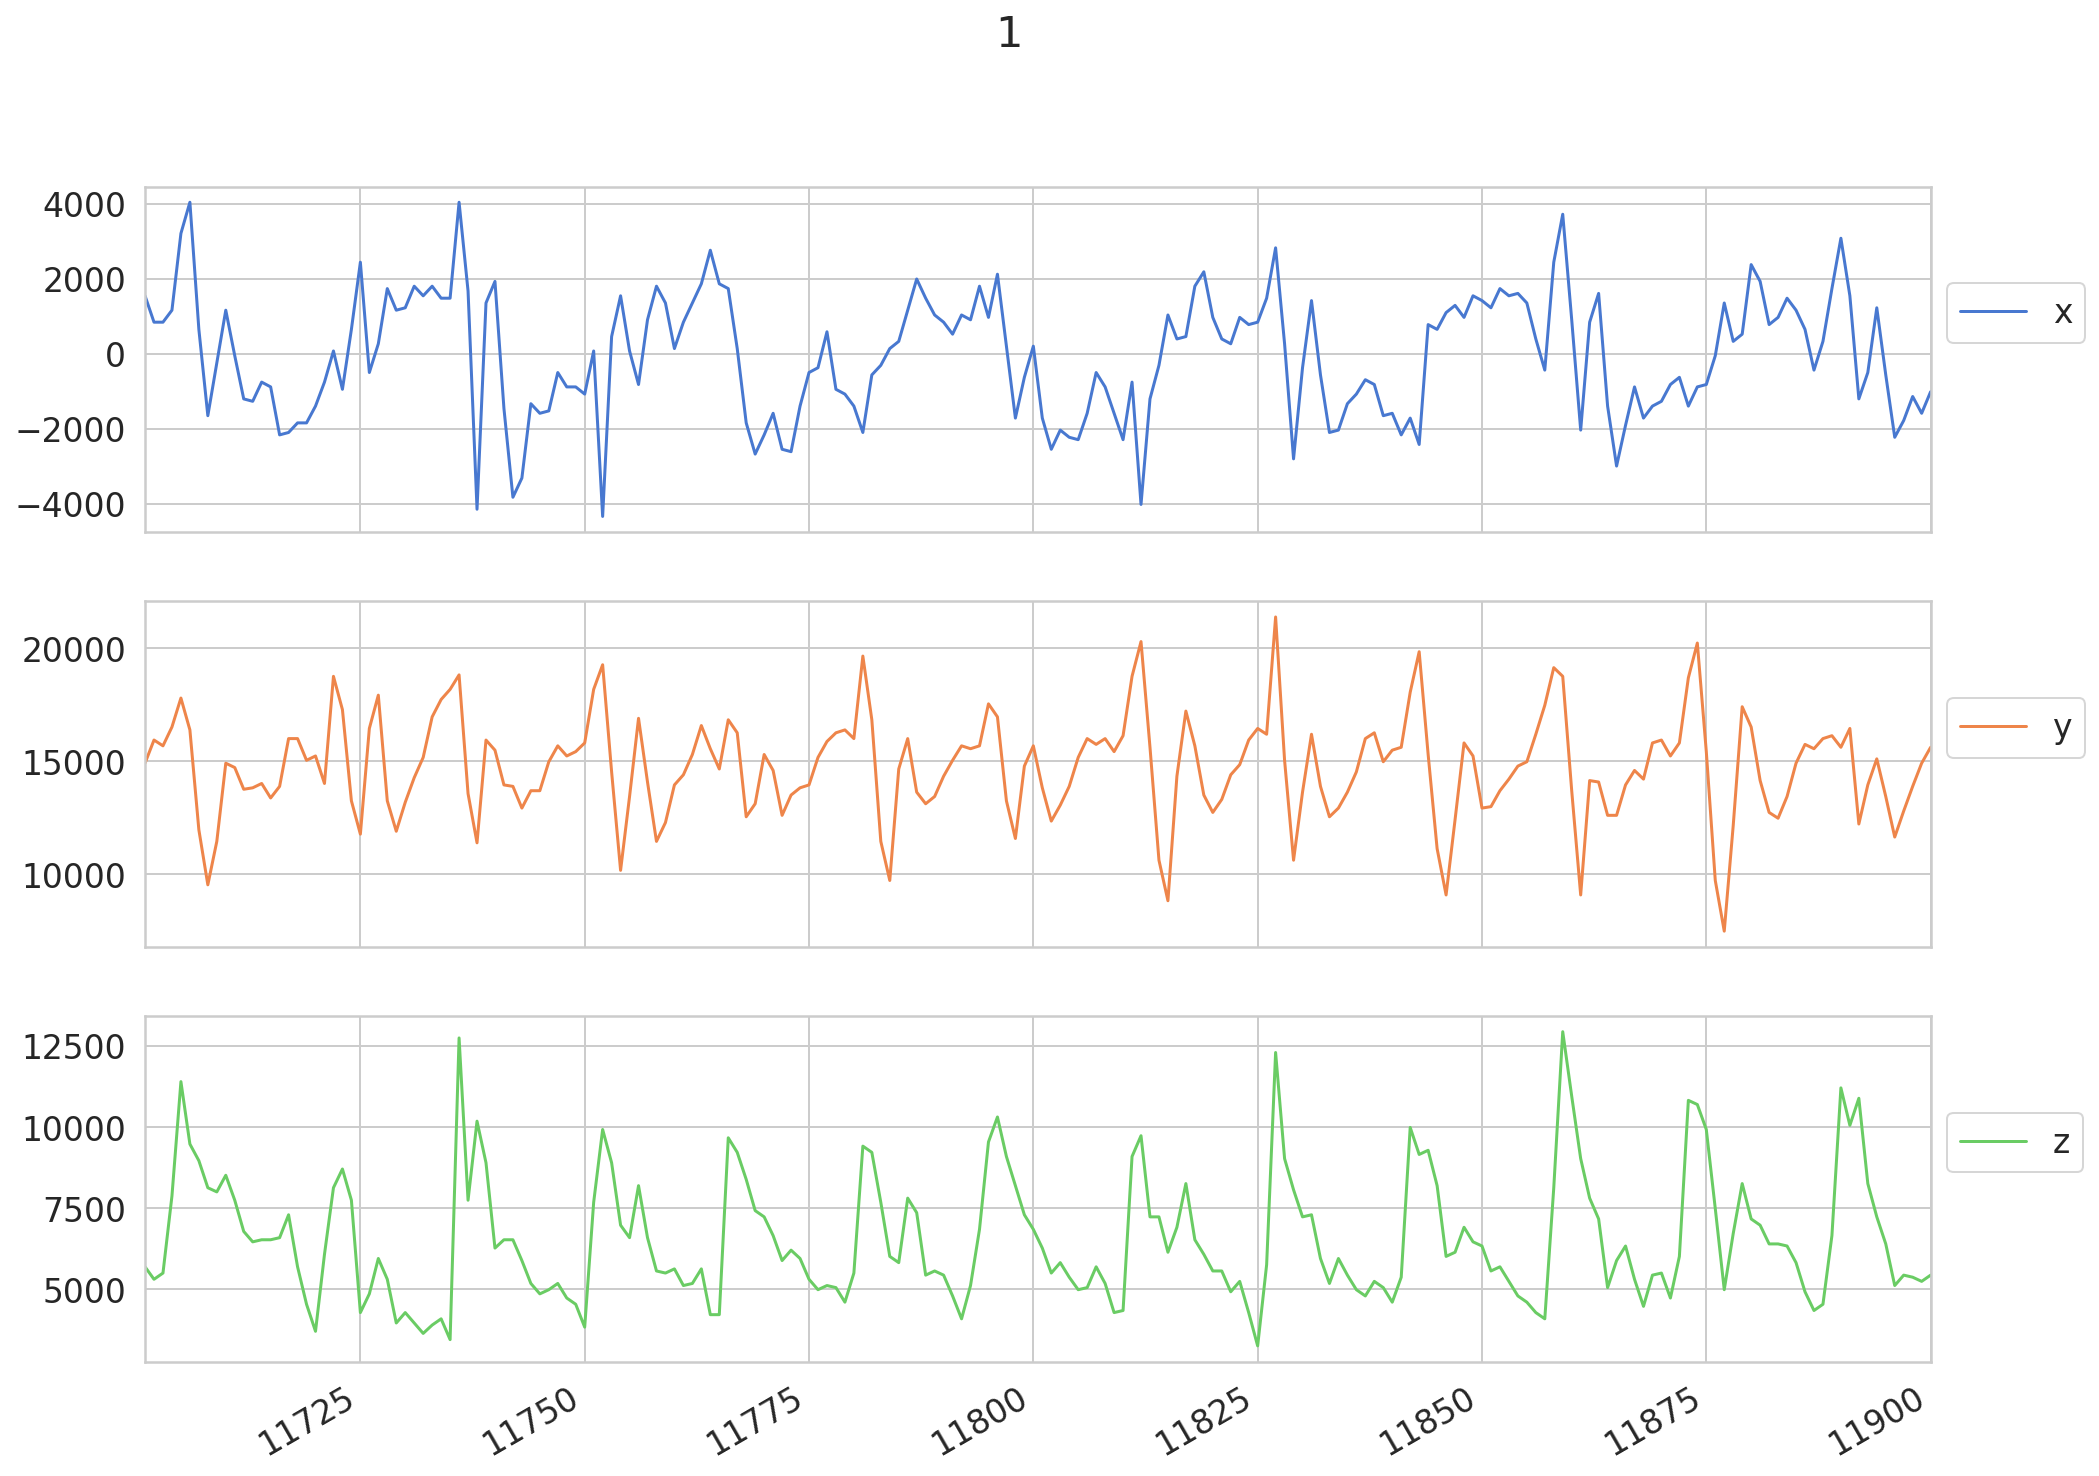

In [33]:
plot_activity(1, df);

### 1. Data Processing
- data_preprocessing.py 산출물 train_data.csv, test_data.csv 을 데이터 프레임으로 변환
- 결측 값을 fillna로 채움.('pad' : Fill values forward ) 

In [2]:
traindf = pd.read_csv('../data/train_data.csv').fillna(method='pad')
testdf = pd.read_csv('../data/test_data.csv').fillna(method='pad')

In [3]:
df_train=traindf
df_test=testdf

####  1.1 Data scaling 
- 모델 성능 향상을 위한 스케일링 과정 (label 제외 x,y,z 축 가속도 값만 스케일링)
- RobustScaler는 특성들이 같은 스케일을 갖게 되지만 평균 대신 중앙값을 사용 ==> 극단 값에 영향을 받지 않음

In [4]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x', 'y', 'z']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

####  1.2 3D-array Transformation 
- timestamp - step 을 조정하여 모델에 입력할 수 있는 3d array 형태로 데이터 가공
- X_train / X_test 는 가속도 데이터, y_train / y_test 는 라벨 데이터 (보행 상태 0-4)
- timestamp-step 은 117-39 / 39-13 와 같은 13의 배수를 이용 (원본 데이터 크기를 고려)
- tiemstamp-step 의 크기가 작을 때 성능이 좋았음

In [5]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 39
STEP = 13

X_train, y_train = create_dataset(
    df_train[['x', 'y', 'z']], 
    df_train.label, 
    TIME_STEPS, 
    STEP
)

X_test, y_test = create_dataset(
    df_test[['x', 'y', 'z']], 
    df_test.label, 
    TIME_STEPS, 
    STEP
)

In [6]:
print(X_train.shape, y_train.shape)

(3598, 39, 3) (3598, 1)


####  1.3 Label data를 0-1 사이 값으로 인코딩

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [8]:
print(X_train.shape, y_train.shape)

(3598, 39, 3) (3598, 5)


> ### 모델 성능 향상 원인 분석
> 1. GRU is a simplified LSTM which merges three doors of LSTM (forget, input and output) into two doors (update and reset) [27]. For tasks with a few data, GRU may achieve a better result than LSTM since it includes less parameters
> 2. Bi LSTM > LSTM : 양방향 -> 주기데이터에 더 적합 
> 3. GRU > LSTM: gru -> 2개 states 라서 더 단순한 데이터에 적합 (9개 features--> 3features)


### 2. Modeling
- 모델 형태를 바꿀 수 있음.
- 단방향 GRU (Bidirectional layer를 생략하면 됌)
- Bi LSTM (GRU layer를 LSTM layer로 변경하면 됌)
- 신경망 노드 수 (units으로 조정) > 100-20 / 120-30 등으로 조정 
- epochmap={2:100,13:500,39:500,117:900,234:1000,468:1500,729:2000} :배치 사이즈가 작으면 epoch 수를 작게 함

In [9]:
def evaluate_model(X_train, y_train, testX, testy,verbose, epochs, batch_size):
    #verbose, epochs, batch_size = 1, 50, 32
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
        keras.layers.GRU(
              units=100, 
              input_shape=[X_train.shape[1], X_train.shape[2]]
          ))
        )
        
    
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=20, activation='relu'))
    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    # fit network
    history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, train_acc = model.evaluate(X_train, y_train,batch_size=batch_size, verbose=1)
    
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return  epochs, batch_size,accuracy,train_acc
def summarize_results(scores):
    
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
def run_experiment(trainX, trainy, testX, testy,batch):
    # load data
    ##trainX, trainy, testX, testy = load_dataset()
    
    # repeat experiment
    scores = list()
    epochmap={2:100,13:500,39:500,117:900,234:1000,468:1500,729:2000}
    for r,batch in enumerate([2,13,39,117,234,468,729]):
        epochs, batch_size,testscore,trainacc = evaluate_model(trainX, trainy, testX, testy,0,epochmap[batch],batch)
        testscore = testscore * 100.0
        trainacc=trainacc*100.0
        print( "epoch:",epochs,"/batch_size:", batch_size)
        print('test>#%d: %.3f' % (r+1, testscore))
        print('train>#%d: %.3f' % (r+1, trainacc))
        scores.append(testscore)
    # summarize results
    summarize_results(scores)

    # run the experiment
    #run_experiment()

#### 노드 수 별로 모든 에폭-배치 사이즈 쌍에 대해 실험

In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-5 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 14s 4ms/sample - loss: 0.0074 - acc: 0.9975
epoch: 100 /batch_size: 2
test>#1: 88.517
train>#1: 99.750
3598/3598 [==============================] - 3s 938us/sample - loss: 0.0016 - acc: 0.9992
epoch: 500 /batch_size: 13
test>#2: 88.071
train>#2: 99.917
3598/3598 [==============================] - 1s 348us/sample - loss: 1.0676e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#3: 90.524
train>#3: 100.000
3598/3598 [==============================] - 1s 230us/sample - loss: 2.6484e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 90.524
train>#4: 100.000
3598/3598 [==============================] - 1s 164us/sample - loss: 5.1009e-06 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 88.963
train>#5: 100.000

In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-5 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 15s 4ms/sample - loss: 0.0101 - acc: 0.9983
epoch: 100 /batch_size: 2
test>#1: 88.517
train>#1: 99.833
3598/3598 [==============================] - 3s 759us/sample - loss: 0.0036 - acc: 0.9992
epoch: 500 /batch_size: 13
test>#2: 88.294
train>#2: 99.917
3598/3598 [==============================] - 2s 421us/sample - loss: 1.1681e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#3: 90.412
train>#3: 100.000
3598/3598 [==============================] - 1s 303us/sample - loss: 0.0395 - acc: 0.9864
epoch: 900 /batch_size: 117
test>#4: 85.953
train>#4: 98.638
3598/3598 [==============================] - 1s 319us/sample - loss: 8.9659e-06 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 87.848
train>#5: 100.000
[88.

### GRU- Highest Accuracy  : 90.97%
- epoch 500 / batch size 13
- timestamp-step : 39-13
- nodes: 100-5

In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-5 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 12s 3ms/sample - loss: 0.0086 - acc: 0.9978
epoch: 100 /batch_size: 2
test>#1: 87.625
train>#1: 99.778
3598/3598 [==============================] - 3s 734us/sample - loss: 7.4703e-06 - acc: 1.0000
epoch: 500 /batch_size: 13
test>#2: 90.970
train>#2: 100.000
3598/3598 [==============================] - 1s 313us/sample - loss: 5.1734e-04 - acc: 0.9997
epoch: 500 /batch_size: 39
test>#3: 87.625
train>#3: 99.972
3598/3598 [==============================] - 1s 195us/sample - loss: 1.6316e-05 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 84.950
train>#4: 100.000
3598/3598 [==============================] - 1s 148us/sample - loss: 2.5134e-05 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 84.058
train>#5: 100

In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-10 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 14s 4ms/sample - loss: 0.0160 - acc: 0.9953
epoch: 100 /batch_size: 2
test>#1: 86.288
train>#1: 99.528
3598/3598 [==============================] - 2s 666us/sample - loss: 0.0074 - acc: 0.9983
epoch: 500 /batch_size: 13
test>#2: 85.507
train>#2: 99.833
3598/3598 [==============================] - 1s 311us/sample - loss: 1.8233e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#3: 86.288
train>#3: 100.000
3598/3598 [==============================] - 1s 203us/sample - loss: 3.7778e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 87.625
train>#4: 100.000
3598/3598 [==============================] - 1s 145us/sample - loss: 4.7083e-04 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 84.838
train>#5: 100.000

In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-30 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 14s 4ms/sample - loss: 0.0904 - acc: 0.9769
epoch: 100 /batch_size: 2
test>#1: 84.169
train>#1: 97.693
3598/3598 [==============================] - 2s 664us/sample - loss: 0.0076 - acc: 0.9975
epoch: 500 /batch_size: 13
test>#2: 88.517
train>#2: 99.750
3598/3598 [==============================] - 1s 316us/sample - loss: 0.0093 - acc: 0.9975
epoch: 500 /batch_size: 39
test>#3: 84.950
train>#3: 99.750
3598/3598 [==============================] - 1s 201us/sample - loss: 8.7151e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 88.740
train>#4: 100.000
3598/3598 [==============================] - 1s 144us/sample - loss: 2.9721e-06 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 83.501
train>#5: 100.000
[84.

In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 90-20 TIME_STEPS = 39 STEP = 13

3598/3598 [==============================] - 14s 4ms/sample - loss: 0.0184 - acc: 0.9956
epoch: 100 /batch_size: 2
test>#1: 83.946
train>#1: 99.555
3598/3598 [==============================] - 2s 693us/sample - loss: 6.7497e-04 - acc: 0.9997
epoch: 500 /batch_size: 13
test>#2: 88.517
train>#2: 99.972
3598/3598 [==============================] - 1s 327us/sample - loss: 7.5601e-04 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#3: 87.402
train>#3: 100.000
3598/3598 [==============================] - 1s 208us/sample - loss: 8.8369e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 87.514
train>#4: 100.000
3598/3598 [==============================] - 1s 167us/sample - loss: 3.8085e-05 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 86.065
train>#5: 100.000
[83.94649028778076, 88.51727843284607, 87.4024510383606, 87.51393556594849, 86.06466054916382]
Accuracy: 86.689% (+/-1.578)


In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 90-10 TIME_STEPS = 39 STEP = 13

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
3598/3598 [==============================] - 14s 4ms/sample - loss: 0.0128 - acc: 0.9967
epoch: 100 /batch_size: 2
test>#1: 85.396
train>#1: 99.666
3598/3598 [==============================] - 2s 656us/sample - loss: 1.0345e-04 - acc: 1.0000
epoch: 500 /batch_size: 13
test>#2: 88.406
train>#2: 100.000
3598/3598 [==============================] - 1s 289us/sample - loss: 1.9757e-05 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#3: 87.068
train>#3: 100.000
3598/3598 [==============================] - 1s 182us/sample - loss: 7.4686e-05 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#4: 85.953
train>#4: 100.000
3598/3598 [==============================] - 0s 138us/sample - loss: 2.1299e-05 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#5: 85.619
train>#5: 10

### Highest Accuracy 89.63 (39-13 / batch 13 epoch 50 nodes:100-20)

In [44]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 100-20 TIME_STEPS = 39 STEP = 13 

3598/3598 [==============================] - 3s 913us/sample - loss: 5.8544e-05 - acc: 1.0000
epoch: 500 /batch_size: 13
test>#1: 89.632
train>#1: 100.000
3598/3598 [==============================] - 2s 518us/sample - loss: 1.3438e-06 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#2: 86.734
train>#2: 100.000
3598/3598 [==============================] - 1s 399us/sample - loss: 2.0675e-06 - acc: 1.0000
epoch: 900 /batch_size: 117
test>#3: 86.845
train>#3: 100.000
3598/3598 [==============================] - 1s 337us/sample - loss: 2.2725e-05 - acc: 1.0000
epoch: 1000 /batch_size: 234
test>#4: 86.622
train>#4: 100.000
[89.63210582733154, 86.7335557937622, 86.8450403213501, 86.62207126617432]
Accuracy: 87.458% (+/-1.258)


#### Highest Accuracy 88.29 (epoch: 900 /batch_size: 39)
  ```
 model = keras.Sequential()
    model.add(
        
        keras.layers.GRU(
              units=90, 
              input_shape=[X_train.shape[1], X_train.shape[2]]
          )
        )
        
    
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=30, activation='relu'))
    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    ```

In [40]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 90-30 TIME_STEPS = 117 STEP = 39 

3598/3598 [==============================] - 2s 448us/sample - loss: 1.7053e-05 - acc: 1.0000
epoch: 900 /batch_size: 39
test>#1: 88.294
train>#1: 100.000
3598/3598 [==============================] - 1s 323us/sample - loss: 1.1077e-06 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#2: 87.960
train>#2: 100.000
3598/3598 [==============================] - 1s 284us/sample - loss: 1.4938e-04 - acc: 1.0000
epoch: 1500 /batch_size: 234
test>#3: 86.734
train>#3: 100.000
[88.29431533813477, 87.95986771583557, 86.7335557937622]
Accuracy: 87.663% (+/-0.671)


In [38]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-30 TIME_STEPS = 117 STEP = 39 

3598/3598 [==============================] - 1s 392us/sample - loss: 1.1619e-05 - acc: 1.0000
epoch: 900 /batch_size: 39
test>#1: 83.166
train>#1: 100.000
3598/3598 [==============================] - 1s 266us/sample - loss: 0.0225 - acc: 0.9967
epoch: 1000 /batch_size: 117
test>#2: 83.835
train>#2: 99.666
3598/3598 [==============================] - 1s 239us/sample - loss: 0.0048 - acc: 0.9986
epoch: 1500 /batch_size: 234
test>#3: 81.494
train>#3: 99.861
[83.16611051559448, 83.83500576019287, 81.49386644363403]
Accuracy: 82.832% (+/-0.985)


In [36]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 30-50 TIME_STEPS = 117 STEP = 39 

3598/3598 [==============================] - 1s 359us/sample - loss: 0.0544 - acc: 0.9833
epoch: 900 /batch_size: 39
test>#1: 77.703
train>#1: 98.332
3598/3598 [==============================] - 1s 222us/sample - loss: 0.0090 - acc: 0.9975
epoch: 1000 /batch_size: 117
test>#2: 79.041
train>#2: 99.750
3598/3598 [==============================] - 1s 203us/sample - loss: 0.0246 - acc: 0.9892
epoch: 1500 /batch_size: 234
test>#3: 79.041
train>#3: 98.916
[77.703458070755, 79.04124855995178, 79.04124855995178]
Accuracy: 78.595% (+/-0.631)


In [34]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

3598/3598 [==============================] - 1s 326us/sample - loss: 0.0505 - acc: 0.9853
epoch: 900 /batch_size: 39
test>#1: 80.156
train>#1: 98.527
3598/3598 [==============================] - 1s 208us/sample - loss: 0.0406 - acc: 0.9878
epoch: 1000 /batch_size: 117
test>#2: 76.477
train>#2: 98.777
3598/3598 [==============================] - 1s 182us/sample - loss: 0.0056 - acc: 0.9989
epoch: 1500 /batch_size: 234
test>#3: 78.595
train>#3: 99.889
[80.15607595443726, 76.47714614868164, 78.5953164100647]
Accuracy: 78.410% (+/-1.508)


In [31]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

3598/3598 [==============================] - 1s 337us/sample - loss: 8.1003e-06 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 85.396
train>#1: 100.000
3598/3598 [==============================] - 1s 207us/sample - loss: 9.5331e-06 - acc: 1.0000
epoch: 1500 /batch_size: 117
test>#2: 82.051
train>#2: 100.000
3598/3598 [==============================] - 1s 185us/sample - loss: 2.8904e-05 - acc: 1.0000
epoch: 1500 /batch_size: 234
test>#3: 80.268
train>#3: 100.000
[85.39576530456543, 82.05128312110901, 80.26756048202515]
Accuracy: 82.572% (+/-2.126)


### 117-39 
( Highest Accuracy : epoch: 1000 /batch_size: 117
    test>#2: 85.522
    train>#2: 100.000 )

In [17]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

1198/1198 [==============================] - 0s 389us/sample - loss: 0.0427 - acc: 0.9925
epoch: 1500 /batch_size: 486
test>#1: 73.737
train>#1: 99.249
[73.73737096786499]
Accuracy: 73.737% (+/-0.000)


In [15]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

1198/1198 [==============================] - 1s 687us/sample - loss: 9.6096e-04 - acc: 1.0000
epoch: 500 /batch_size: 39
test>#1: 79.461
train>#1: 100.000
1198/1198 [==============================] - 0s 404us/sample - loss: 0.0118 - acc: 0.9975
epoch: 700 /batch_size: 117
test>#2: 82.492
train>#2: 99.750
1198/1198 [==============================] - 0s 370us/sample - loss: 0.0501 - acc: 0.9841
epoch: 1000 /batch_size: 234
test>#3: 79.798
train>#3: 98.414
1198/1198 [==============================] - 0s 372us/sample - loss: 0.1701 - acc: 0.9207
epoch: 1000 /batch_size: 486
test>#4: 65.320
train>#4: 92.070
[79.46127653121948, 82.49158263206482, 79.79797720909119, 65.31986594200134]
Accuracy: 76.768% (+/-6.713)


In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
1198/1198 [==============================] - 1s 601us/sample - loss: 0.2813 - acc: 0.8856
epoch: 200 /batch_size: 39
test>#1: 77.104
train>#1: 88.564
1198/1198 [==============================] - 0s 327us/sample - loss: 0.0013 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#2: 85.522
train>#2: 100.000
1198/1198 [==============================] - 0s 295us/sample - loss: 0.0744 - acc: 0.9699
epoch: 1000 /batch_size: 234
test>#3: 80.808
train>#3: 96.995
[77.10437774658203, 85.52188277244568, 80.8080792427063]
Accuracy: 81.145% (+/-3.445)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 117 STEP = 39 

1198/1198 [==============================] - 1s 677us/sample - loss: 0.4087 - acc: 0.8272
epoch: 200 /batch_size: 39
test>#1: 67.003
train>#1: 82.721
1198/1198 [==============================] - 0s 378us/sample - loss: 0.0510 - acc: 0.9850
epoch: 500 /batch_size: 117
test>#2: 83.165
train>#2: 98.497
1198/1198 [==============================] - 0s 335us/sample - loss: 0.9589 - acc: 0.6068
epoch: 1000 /batch_size: 243
test>#3: 54.545
train>#3: 60.684
[67.00336933135986, 83.16498398780823, 54.54545617103577]
Accuracy: 68.238% (+/-11.716)


In [11]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-70 TIME_STEPS = 234 STEP = 117 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
399/399 [==============================] - 1s 1ms/sample - loss: 7.7906e-05 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 75.510
train>#1: 100.000
399/399 [==============================] - 0s 840us/sample - loss: 0.0025 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#2: 59.184
train>#2: 100.000
399/399 [==============================] - 0s 807us/sample - loss: 0.6271 - acc: 0.7293
epoch: 1000 /batch_size: 243
test>#3: 52.041
train>#3: 72.932
399/399 [==============================] - 0s 802us/sample - loss: 0.2256 - acc: 0.9373
epoch: 2000 /batch_size: 486
test>#4: 60.204
train>#4: 93.734
[75.51020383834839, 59.183675050735474, 52.040815353393555, 60.20408272743225]
Accuracy: 61.735% (+/-8.553)


### Highest Accuracy 76.53 GRU - 234-117 50-70
epoch 1000 batchsize 39

In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-70 TIME_STEPS = 234 STEP = 117 

399/399 [==============================] - 1s 2ms/sample - loss: 0.0043 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 76.531
train>#1: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.3824 - acc: 0.8622
epoch: 1000 /batch_size: 117
test>#2: 57.143
train>#2: 86.216
399/399 [==============================] - 1s 2ms/sample - loss: 0.3767 - acc: 0.8647
epoch: 1000 /batch_size: 243
test>#3: 59.184
train>#3: 86.466
399/399 [==============================] - 1s 2ms/sample - loss: 0.0627 - acc: 0.9925
epoch: 2000 /batch_size: 486
test>#4: 61.224
train>#4: 99.248
399/399 [==============================] - 1s 2ms/sample - loss: 0.1360 - acc: 0.9474
epoch: 2000 /batch_size: 729
test>#5: 65.306
train>#5: 94.737
[76.53061151504517, 57.14285969734192, 59.183675050735474, 61.22449040412903, 65.30612111091614]
Accuracy: 63.878% (+/-6.878)


### Hightest Accuracy 76.53 GRU - 117  (50-100)

In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-100 TIME_STEPS = 234 STEP = 117 

399/399 [==============================] - 1s 2ms/sample - loss: 0.0691 - acc: 0.9850
epoch: 1000 /batch_size: 39
test>#1: 58.163
train>#1: 98.496
399/399 [==============================] - 1s 2ms/sample - loss: 0.0312 - acc: 0.9950
epoch: 1000 /batch_size: 117
test>#2: 76.531
train>#2: 99.499
399/399 [==============================] - 1s 2ms/sample - loss: 0.9514 - acc: 0.6190
epoch: 1000 /batch_size: 243
test>#3: 35.714
train>#3: 61.905
399/399 [==============================] - 0s 1ms/sample - loss: 0.0041 - acc: 1.0000
epoch: 2000 /batch_size: 486
test>#4: 75.510
train>#4: 100.000
399/399 [==============================] - 0s 1ms/sample - loss: 0.2124 - acc: 0.9323
epoch: 2000 /batch_size: 729
test>#5: 63.265
train>#5: 93.233
[58.163267374038696, 76.53061151504517, 35.71428656578064, 75.51020383834839, 63.26530575752258]
Accuracy: 61.837% (+/-14.838)


In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 60-150 TIME_STEPS = 234 STEP = 117 Bidirectional

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
399/399 [==============================] - 1s 3ms/sample - loss: 1.0112e-04 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 60.204
train>#1: 100.000
399/399 [==============================] - 0s 1ms/sample - loss: 1.6074e-04 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#2: 60.204
train>#2: 100.000
399/399 [==============================] - 0s 1ms/sample - loss: 5.6993e-04 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#3: 64.286
train>#3: 100.000
399/399 [==============================] - 1s 1ms/sample - loss: 1.2659e-04 - acc: 1.0000
epoch: 2000 /batch_size: 486
test>#4: 63.265
train>#4: 100.000
399/399 [==============================] - 1s 1ms/sample - loss: 3.9129e-04 - acc: 1.0000
epoch: 2000 /batch_size: 729
test>#5: 64.286
train>#5: 100.000
[

In [ ]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 30-70 TIME_STEPS = 234 STEP = 117 Bidirectional

399/399 [==============================] - 1s 3ms/sample - loss: 0.0014 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 66.327
train>#1: 100.000
399/399 [==============================] - 1s 3ms/sample - loss: 0.0253 - acc: 0.9950
epoch: 1000 /batch_size: 117
test>#2: 58.163
train>#2: 99.499
399/399 [==============================] - 1s 3ms/sample - loss: 0.0706 - acc: 0.9950
epoch: 1000 /batch_size: 243
test>#3: 56.122
train>#3: 99.499


In [20]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 30-150 TIME_STEPS = 234 STEP = 117 Bidirectional

399/399 [==============================] - 1s 2ms/sample - loss: 0.0017 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 65.306
train>#1: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0034 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#2: 54.082
train>#2: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0282 - acc: 0.9975
epoch: 1000 /batch_size: 243
test>#3: 56.122
train>#3: 99.749
399/399 [==============================] - 1s 2ms/sample - loss: 0.0054 - acc: 1.0000
epoch: 2000 /batch_size: 486
test>#4: 56.122
train>#4: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0053 - acc: 1.0000
epoch: 2000 /batch_size: 729
test>#5: 54.082
train>#5: 100.000
[65.30612111091614, 54.08163070678711, 56.122446060180664, 56.122446060180664, 54.08163070678711]
Accuracy: 57.143% (+/-4.182)


In [18]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150 TIME_STEPS = 234 STEP = 117 Bidirectional

399/399 [==============================] - 1s 2ms/sample - loss: 6.8638e-06 - acc: 1.0000
epoch: 1000 /batch_size: 39
test>#1: 71.429
train>#1: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0202 - acc: 0.9925
epoch: 1000 /batch_size: 117
test>#2: 56.122
train>#2: 99.248
399/399 [==============================] - 1s 2ms/sample - loss: 0.0048 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#3: 56.122
train>#3: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0033 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#4: 63.265
train>#4: 100.000
399/399 [==============================] - 1s 2ms/sample - loss: 0.0094 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#5: 54.082
train>#5: 100.000
[71.42857313156128, 56.122446060180664, 56.122446060180664, 63.26530575752258, 54.08163070678711]
Accuracy: 60.204% (+/-6.421)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150 TIME_STEPS = 234 STEP = 117

399/399 [==============================] - 1s 2ms/sample - loss: 0.0273 - acc: 0.9950
epoch: 1500 /batch_size: 39
test>#1: 60.204
train>#1: 99.499
399/399 [==============================] - 0s 1ms/sample - loss: 0.0306 - acc: 0.9950
epoch: 1500 /batch_size: 117
test>#2: 64.286
train>#2: 99.499
399/399 [==============================] - 0s 1ms/sample - loss: 0.0475 - acc: 0.9900
epoch: 1500 /batch_size: 243
test>#3: 64.286
train>#3: 98.997
399/399 [==============================] - 0s 1ms/sample - loss: 0.3989 - acc: 0.8571
epoch: 1500 /batch_size: 486
test>#4: 57.143
train>#4: 85.714
399/399 [==============================] - 0s 1ms/sample - loss: 0.3039 - acc: 0.8947
epoch: 1500 /batch_size: 729
test>#5: 68.367
train>#5: 89.474
[60.20408272743225, 64.28571343421936, 64.28571343421936, 57.14285969734192, 68.36734414100647]
Accuracy: 62.857% (+/-3.851)


In [10]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 40-120 TIME_STEPS = 234 STEP = 117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
399/399 [==============================] - 0s 672us/sample - loss: 0.1316 - acc: 0.9549
epoch: 1000 /batch_size: 117
test>#1: 63.265
train>#1: 95.489
399/399 [==============================] - 0s 553us/sample - loss: 0.2503 - acc: 0.9198
epoch: 1000 /batch_size: 243
test>#2: 62.245
train>#2: 91.980
399/399 [==============================] - 0s 570us/sample - loss: 0.9179 - acc: 0.6566
epoch: 1000 /batch_size: 486
test>#3: 52.041
train>#3: 65.664
399/399 [==============================] - 0s 626us/sample - loss: 0.8022 - acc: 0.6717
epoch: 1000 /batch_size: 729
test>#4: 46.939
train>#4: 67.168
[63.26530575752258, 62.244898080825806, 52.040815353393555, 46.93877696990967]
Accuracy: 56.122% (+/-6.883)


In [ ]:
#배치 사이즈가 큰 경우는 epoch을 증가해야할 듯 (117-117 로 데이터 사이즈가 줄었으니 노드 수를 더 줄여보기...비율을 줄이거나)
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 40-120 TIME_STEPS = 117 STEP = 117

400/400 [==============================] - 0s 1ms/sample - loss: 0.0181 - acc: 0.9975
epoch: 1000 /batch_size: 117
test>#1: 72.727
train>#1: 99.750
400/400 [==============================] - 0s 1ms/sample - loss: 0.1787 - acc: 0.9450
epoch: 1000 /batch_size: 243
test>#2: 66.667
train>#2: 94.500
400/400 [==============================] - 1s 1ms/sample - loss: 0.1848 - acc: 0.9575
epoch: 1000 /batch_size: 486
test>#3: 64.646
train>#3: 95.750


In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150 TIME_STEPS = 117 STEP = 117

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
400/400 [==============================] - 0s 499us/sample - loss: 0.0056 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 65.657
train>#1: 100.000
400/400 [==============================] - 0s 492us/sample - loss: 0.0187 - acc: 0.9975
epoch: 1000 /batch_size: 243
test>#2: 60.606
train>#2: 99.750
400/400 [==============================] - 0s 506us/sample - loss: 0.3255 - acc: 0.9050
epoch: 1000 /batch_size: 486
test>#3: 55.556
train>#3: 90.500
400/400 [==============================] - 0s 562us/sample - loss: 0.2037 - acc: 0.9275
epoch: 1000 /batch_size: 729
test>#4: 62.626
train>#4: 92.750
400/400 [==============================] - 0s 621us/sample - loss: 0.2341 - acc: 0.9150
epoch: 1000 /batch_size: 972
test>#5: 57.576
train>#5: 91.500
[65.6565666198

## highest accuracy : 71.43

TIME_STEPS = 234
STEP = 117

```
 model = keras.Sequential()
    model.add(
        keras.layers.GRU(
              units=50, 
              input_shape=[X_train.shape[1], X_train.shape[2]]
          )
        )
    
    model.add(keras.layers.Dropout(rate=0.5))
    model.add(keras.layers.Dense(units=150, activation='relu'))
    model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    # fit network
    history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
```

In [15]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150 243-117

399/399 [==============================] - 1s 1ms/sample - loss: 0.0035 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 66.327
train>#1: 100.000
399/399 [==============================] - 0s 929us/sample - loss: 0.1130 - acc: 0.9699
epoch: 1000 /batch_size: 243
test>#2: 71.429
train>#2: 96.992
399/399 [==============================] - 0s 955us/sample - loss: 0.5544 - acc: 0.7719
epoch: 1000 /batch_size: 486
test>#3: 51.020
train>#3: 77.193
399/399 [==============================] - 0s 1ms/sample - loss: 0.6277 - acc: 0.7569
epoch: 1000 /batch_size: 729
test>#4: 50.000
train>#4: 75.689
399/399 [==============================] - 0s 1ms/sample - loss: 0.2644 - acc: 0.9023
epoch: 1000 /batch_size: 972
test>#5: 61.224
train>#5: 90.226
[66.32652878761292, 71.42857313156128, 51.02040767669678, 50.0, 61.22449040412903]
Accuracy: 60.000% (+/-8.400)


In [13]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 0s 936us/sample - loss: 0.3894 - acc: 0.8850
epoch: 1000 /batch_size: 243
test>#1: 44.898
train>#1: 88.500
200/200 [==============================] - 0s 1ms/sample - loss: 0.0369 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#2: 46.939
train>#2: 100.000
200/200 [==============================] - 0s 1ms/sample - loss: 0.0377 - acc: 0.9900
epoch: 1000 /batch_size: 729
test>#3: 51.020
train>#3: 99.000
[44.897958636283875, 46.93877696990967, 51.02040767669678]
Accuracy: 47.619% (+/-2.545)


In [18]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 5ms/sample - loss: 0.0043 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#1: 42.857
train>#1: 100.000
200/200 [==============================] - 1s 6ms/sample - loss: 0.0016 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 6ms/sample - loss: 0.0055 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#3: 51.020
train>#3: 100.000
[42.85714328289032, 40.816327929496765, 51.02040767669678]
Accuracy: 44.898% (+/-4.409)


In [16]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 4ms/sample - loss: 0.1631 - acc: 0.9600
epoch: 1000 /batch_size: 243
test>#1: 38.776
train>#1: 96.000
200/200 [==============================] - 1s 5ms/sample - loss: 0.0466 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 4ms/sample - loss: 0.0159 - acc: 1.0000
epoch: 1000 /batch_size: 729
test>#3: 46.939
train>#3: 100.000
[38.77550959587097, 40.816327929496765, 46.93877696990967]
Accuracy: 42.177% (+/-3.469)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 3ms/sample - loss: 0.0040 - acc: 1.0000
epoch: 1500 /batch_size: 243
test>#1: 44.898
train>#1: 100.000
200/200 [==============================] - 1s 4ms/sample - loss: 0.0085 - acc: 0.9950
epoch: 1500 /batch_size: 486
test>#2: 32.653
train>#2: 99.500
200/200 [==============================] - 1s 3ms/sample - loss: 0.0598 - acc: 0.9800
epoch: 1500 /batch_size: 729
test>#3: 42.857
train>#3: 98.000
[44.897958636283875, 32.65306055545807, 42.85714328289032]
Accuracy: 40.136% (+/-5.356)


In [12]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-150

200/200 [==============================] - 1s 3ms/sample - loss: 0.0017 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 48.980
train>#1: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0047 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#2: 42.857
train>#2: 100.000
200/200 [==============================] - 0s 2ms/sample - loss: 0.0214 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#3: 57.143
train>#3: 100.000
[48.97959232330322, 42.85714328289032, 57.14285969734192]
Accuracy: 49.660% (+/-5.852)


In [18]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50 

200/200 [==============================] - 0s 2ms/sample - loss: 0.0865 - acc: 0.9950
epoch: 1500 /batch_size: 117
test>#1: 36.735
train>#1: 99.500
200/200 [==============================] - 0s 2ms/sample - loss: 0.0017 - acc: 1.0000
epoch: 1500 /batch_size: 243
test>#2: 40.816
train>#2: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0013 - acc: 1.0000
epoch: 1500 /batch_size: 486
test>#3: 44.898
train>#3: 100.000
[36.73469424247742, 40.816327929496765, 44.897958636283875]
Accuracy: 40.816% (+/-3.333)


In [16]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.5 nodes 50-125

200/200 [==============================] - 1s 3ms/sample - loss: 0.0015 - acc: 1.0000
epoch: 1000 /batch_size: 117
test>#1: 44.898
train>#1: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0455 - acc: 1.0000
epoch: 1000 /batch_size: 243
test>#2: 32.653
train>#2: 100.000
200/200 [==============================] - 1s 3ms/sample - loss: 0.0041 - acc: 1.0000
epoch: 1000 /batch_size: 486
test>#3: 48.980
train>#3: 100.000
[44.897958636283875, 32.65306055545807, 48.97959232330322]
Accuracy: 42.177% (+/-6.937)


In [14]:
run_experiment(X_train,y_train,X_test,y_test,243) #dropout 0.2 nodes 100 batchsize= [117,243,360,486,729]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
200/200 [==============================] - 0s 1ms/sample - loss: 0.0028 - acc: 1.0000
epoch: 500 /batch_size: 117
test>#1: 42.857
train>#1: 100.000
200/200 [==============================] - 0s 1ms/sample - loss: 0.0028 - acc: 1.0000
epoch: 500 /batch_size: 243
test>#2: 34.694
train>#2: 100.000
200/200 [==============================] - 0s 2ms/sample - loss: 0.0080 - acc: 1.0000
epoch: 500 /batch_size: 486
test>#3: 36.735
train>#3: 100.000
[42.85714328289032, 34.69387888908386, 36.73469424247742]
Accuracy: 38.095% (+/-3.469)


In [9]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=125, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [1]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=243,
   # validation_split=0.2,
   # shuffle=True
)

NameError: name 'model' is not defined

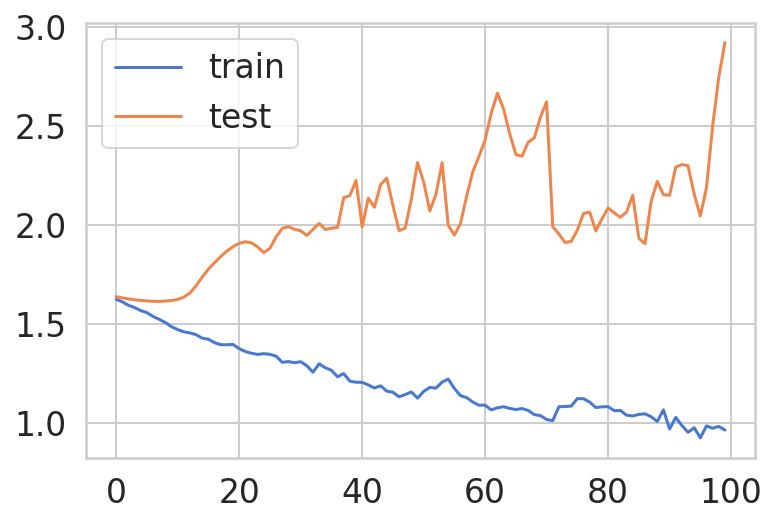

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [13]:
model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 3ms/sample - loss: 1.8270 - acc: 0.2653


[1.8270119161021954, 0.26530612]

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
    
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(18, 16)) 
    ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
    )

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

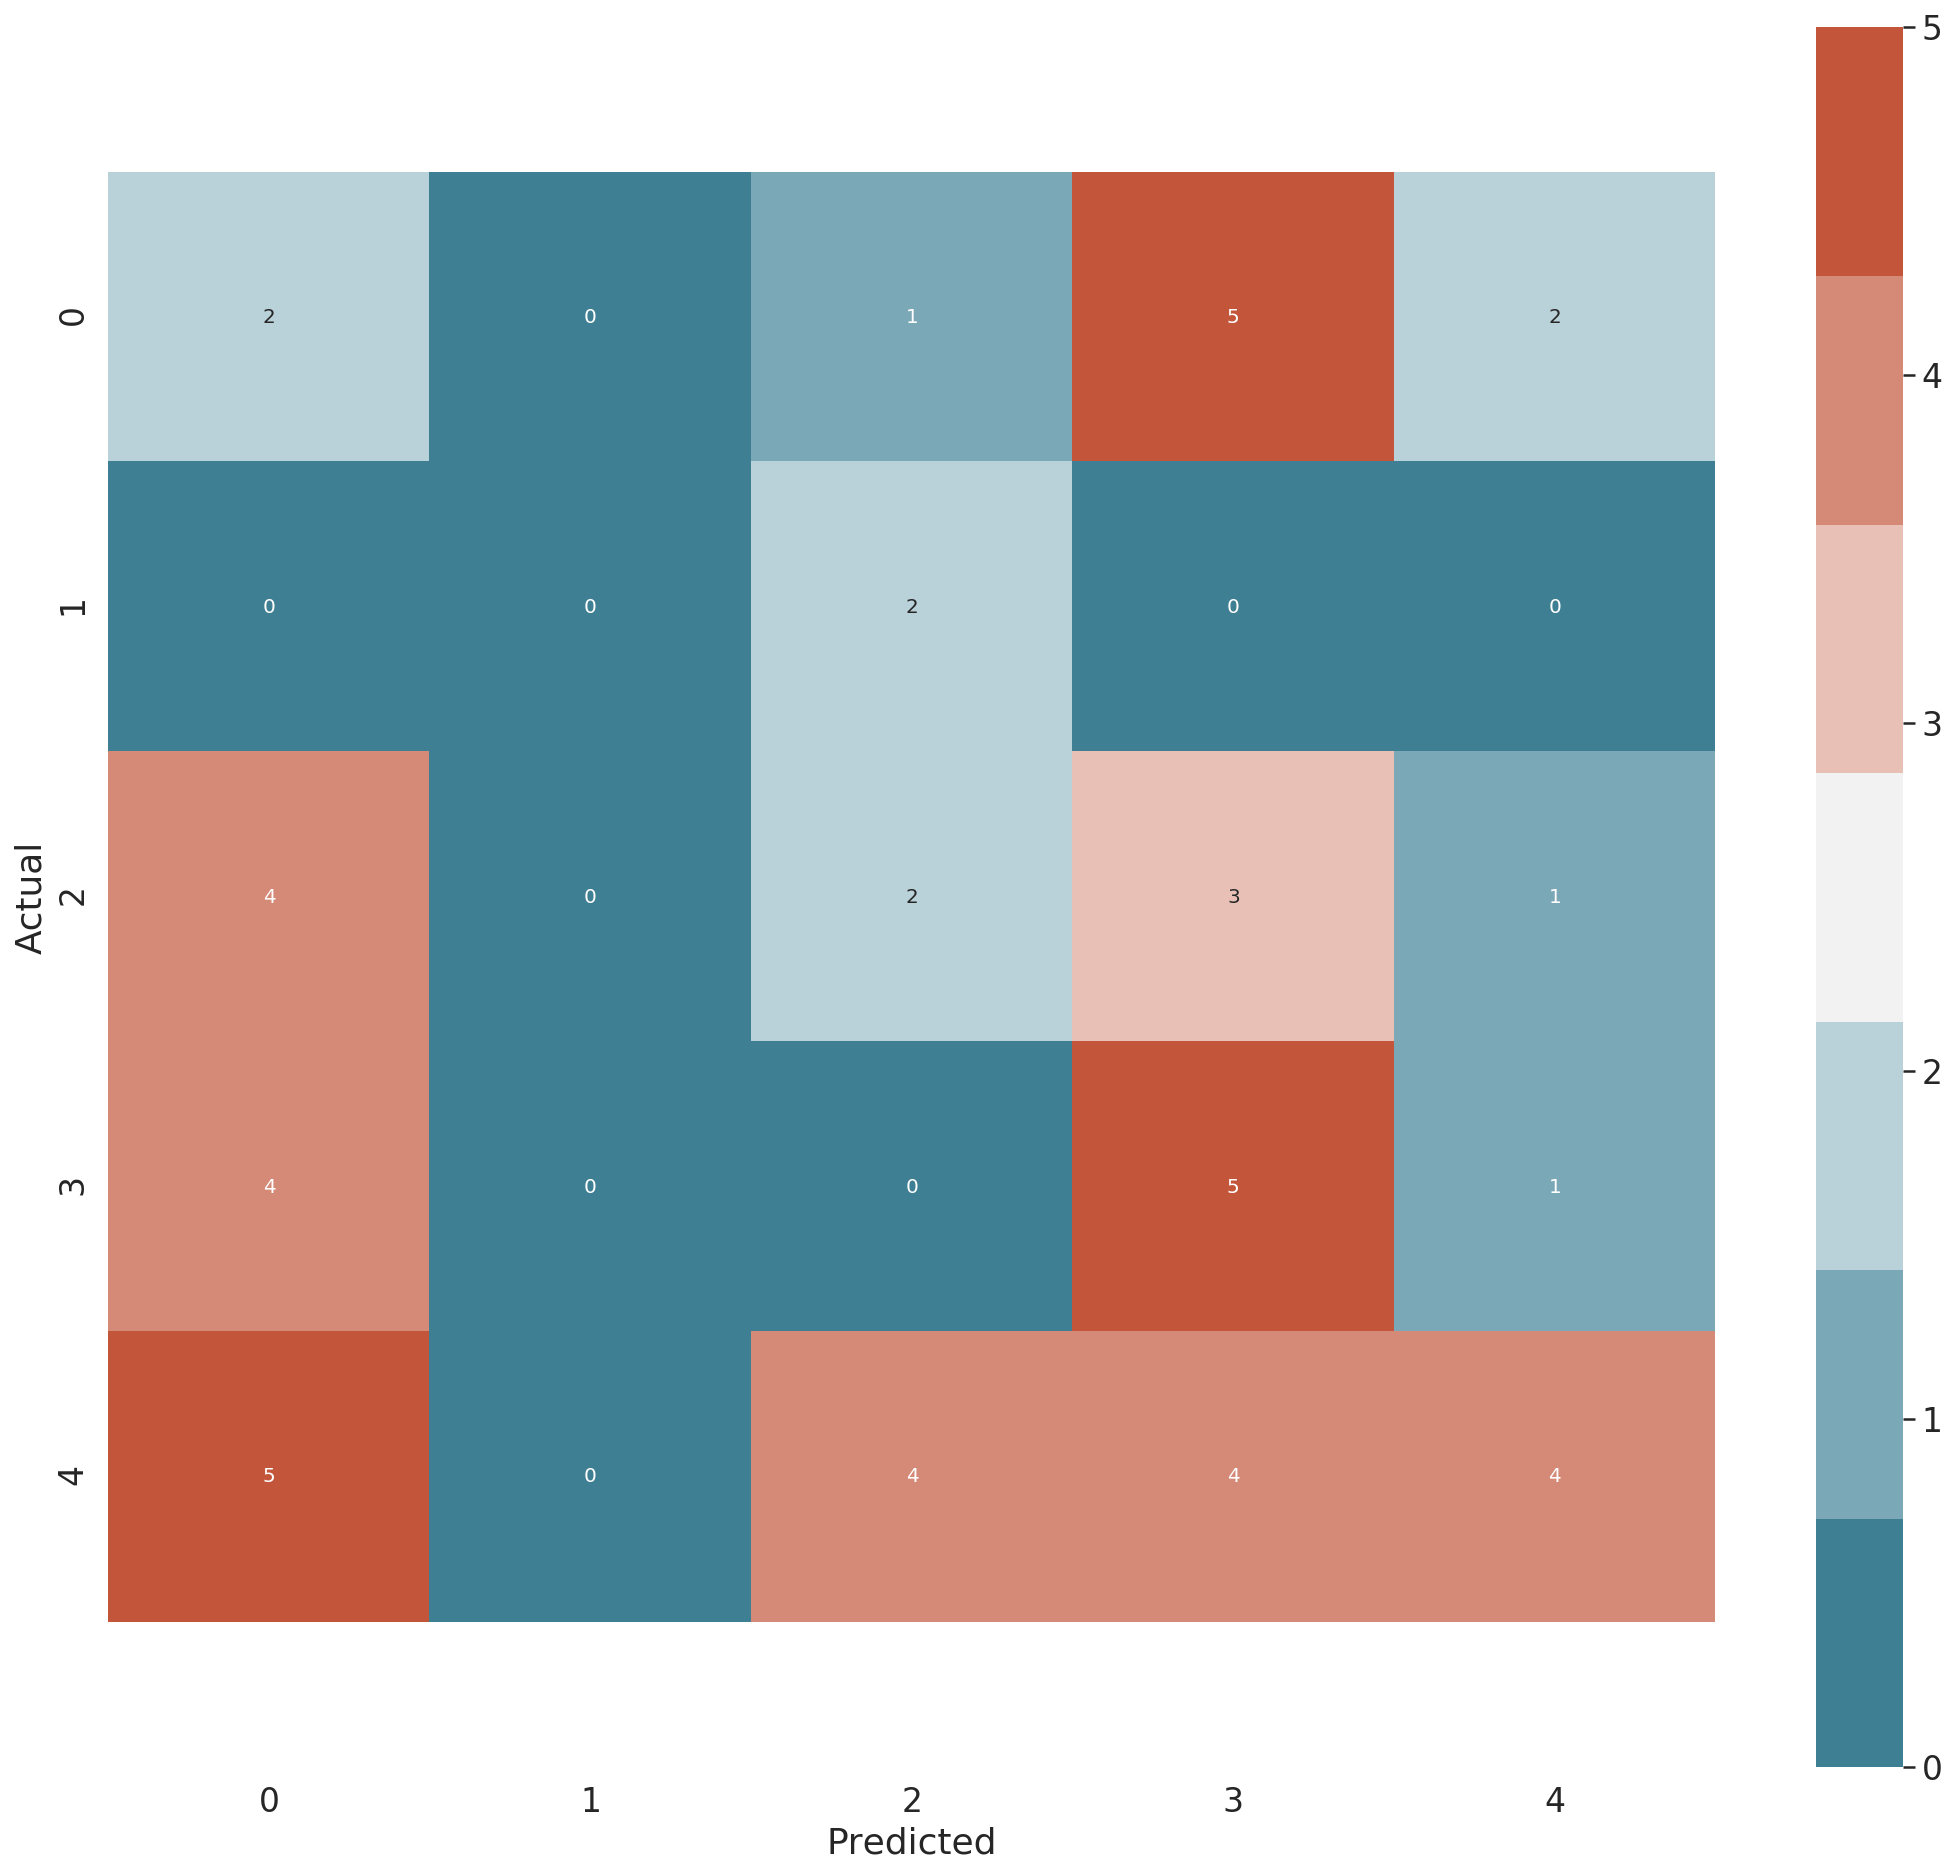

In [15]:
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)